### **Role Analysis:**

### 1. **Role Interactions:**

- Create a matrix and graph that shows interactions between different roles. These are visually represented as an heatmap and a network graph where nodes represent roles, and edges represent interactions. The weight is as bigger as the number of interactions

### Measures: 

- Identify clusters of roles that frequently interact with each other. Are there certain groups of roles that collaborate or conflict more often?

- Calculate network centrality measures (degree centrality, betweenness centrality) for each character based on their role.

- Identify which roles play a central role in the overall network structure. This can provide insights into the importance of different roles in advancing the storyline.

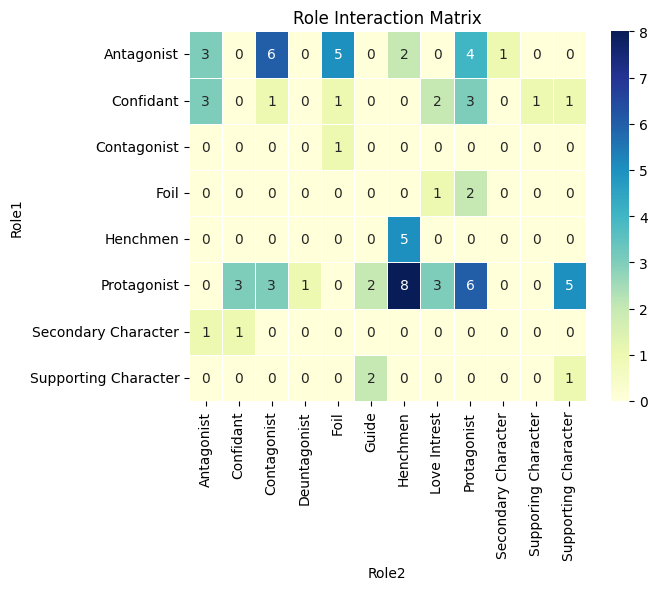

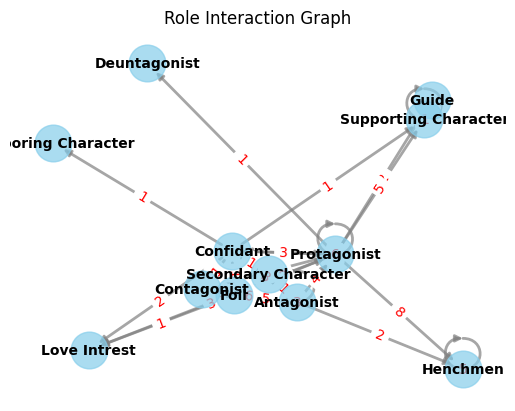

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# List of tuples representing interactions
role_dict = {
'Hamlet': 'Protagonist',
'King Claudius': 'Antagonist', 
'Queen Gertrude': 'Contagonist',
'Horatio': 'Confidant', 
'Polonius': 'Confidant',
'Laertes': 'Foil', 
'Ophelia': 'Love Intrest', 
'Bernardo': 'Supporting Character', 
'Francisco': 'Supporting Character', 
'Marcellus': 'Supporting Character', 
'Ghost': 'Guide',
'King Fortinbras': 'Background Character', 
'Voltimand': 'Supporting Character',
'Lords': 'Secondary Character',
'Attendants': 'Secondary Character',
'Rosencrantz': 'Henchmen', 
'Guildenstern': 'Henchmen',
'Ambassadors from Norway': 'Secondary Character',
'Players': 'Supporting Character',
'First Player': 'Supporting Character',
'Reynaldo': 'Supporing Character',
'Lucianus': 'Supporting Character',
'Player King': 'Secondary Charachter',
'Player Queen': 'Secondary Character',
'Captain': 'Secondary Character',
'Gentlemen': 'Background Character',
'Servant': 'Secondary Character',
'First Sailor': 'Secondary Character',
'First Clown': 'Secondary Character',
'Second Clown': 'Secondary Character',
'Priest': 'Secondary Character',
'First Ambassador': 'Secondary Character',
'Osric': 'Supporting Character', 
'A Lord': 'Secondary Character',
'Cornelius': 'Supporting Character',
'Messenger': 'Secondary Character',
'Fortinbras' : 'Deuntagonist',
'Ladies': 'Background Character',
'Sailors': 'Background Character',
}




interactions = [
    ("Bernardo", "Francisco", 1),
    ("Bernardo", "Ghost", 1),
    ("Francisco", "Ghost", 1),
    ("Horatio", "Marcellus", 1),
    ("Horatio", "Hamlet", 3),
    ("King Claudius", "Queen Gertrude", 6),
    ("King Claudius", "Laertes", 5),
    ("Hamlet", "Queen Gertrude", 3),
    ("King Claudius", "Hamlet", 4),
    ("Hamlet", "Ghost", 2),
    ("Laertes", "Ophelia", 1),
    ("Polonius", "Ophelia", 2),
    ("Polonius", "Laertes", 1),
    ("Polonius", "Reynaldo", 1),
    ("Rosencrantz", "Guildenstern", 5),
    ("Hamlet", "Players", 3),
    ("King Claudius", "Ambassadors from Norway", 1),
    ("Polonius", "King Claudius", 3),
    ("Hamlet", "Ophelia", 3),
    ("Hamlet", "Polonius", 3),
    ("Hamlet", "Hamlet", 6),
    ("Hamlet", "First Player", 1),
    ("Hamlet", "Rosencrantz", 4),
    ("Hamlet", "Guildenstern", 4),
    ("King Claudius", "King Claudius", 3),
    ("Polonius", "Queen Gertrude", 1),
    ("King Claudius", "Rosencrantz", 1),
    ("King Claudius", "Guildenstern", 1),
    ("The Servant", "Horatio", 1),
    ("First Sailor", "Horatio", 1),
    ("Messenger", "King Claudius", 1),
    ("Queen Gertrude", "Laertes", 1),
    ("Clowns", "Clowns", 1),
    ("Hamlet", "Clowns", 1),
    ("Laertes", "Hamlet", 2),
    ("Hamlet", "Osric", 1),
    ("Hamlet", "Fortinbras", 1)
]

# Create a DataFrame
df = pd.DataFrame(interactions, columns=["Character1", "Character2", "Number of Interactions"])

# Map character names to roles using the role_dict
df["Role1"] = df["Character1"].map(role_dict)
df["Role2"] = df["Character2"].map(role_dict)

# Create a role interaction matrix
interaction_matrix = pd.pivot_table(df, values="Number of Interactions", index="Role1", columns="Role2", aggfunc=np.sum, fill_value=0)

# Visualize the role interaction matrix as a heatmap
file_roles = interaction_matrix.to_csv("role-analysis/roles_interactions.csv")
sns.heatmap(interaction_matrix, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title("Role Interaction Matrix")
plt.show()





import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

# ... (your existing code)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph based on the role interaction matrix
for role1 in interaction_matrix.index:
    for role2 in interaction_matrix.columns:
        weight = interaction_matrix.loc[role1, role2]
        if weight > 0:
            G.add_edge(role1, role2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # You can use different layout algorithms based on your preference
edge_labels = {(role1, role2): weight['weight'] for role1, role2, weight in G.edges(data=True)}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='skyblue', alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray', alpha=0.7)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

file_path = "graphs/roles_interaction_graph.gexf"
nx.write_gexf(G, file_path)
# Display the graph
plt.title("Role Interaction Graph")
plt.axis('off')  # Turn off axis labels
plt.show()